# Install required packages

In [2]:
# %pip install pm4py graphviz prefixspan

# Import required libraries

In [3]:
import pm4py
from pprint import pprint
import pandas as pd
from pm4py import conformance, stats, utils, filtering
from pm4py.utils import sample_cases

# Import a sample event log

In [4]:
# def import_xes(file_path):
#     event_log = pm4py.read_xes(file_path)
#     start_activities = pm4py.get_start_activities(event_log)
#     end_activities = pm4py.get_end_activities(event_log)
#     print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))
#     return event_log

# log = import_xes("Synthetic event logs - review example large.xes.gz_1_all/review_example_large.xes.gz")

# Import a sample event log

In [5]:
def import_csv(file_path):
    df = pd.read_csv(file_path)
    event_log = pm4py.utils.format_dataframe(df, case_id='case_id', activity_key='activity_name', timestamp_key='timestamp')
    num_events = len(event_log)
    num_cases = len(event_log.case_id.unique())

    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))
    return event_log 

log = import_csv("archive/Insurance_claims_event_log.csv")

Number of events: 180000
Number of cases: 30000


# Inspecting the logs

log is a pandas dataframe

In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   case_id            180000 non-null  object             
 1   activity_name      180000 non-null  object             
 2   timestamp          180000 non-null  datetime64[ns, UTC]
 3   claimant_name      180000 non-null  object             
 4   agent_name         180000 non-null  object             
 5   adjuster_name      180000 non-null  object             
 6   claim_amount       180000 non-null  float64            
 7   claimant_age       180000 non-null  int64              
 8   type_of_policy     180000 non-null  object             
 9   car_make           180000 non-null  object             
 10  car_model          180000 non-null  object             
 11  car_year           180000 non-null  int64              
 12  type_of_accident   180000 non-

In [7]:
log.describe()

,claim_amount,claimant_age,car_year,@@index,@@case_index
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,5498.598991,51.510233,2016.034367,89999.500000,14999.500000
std,2601.273015,19.691143,3.745014,51961.668564,8660.278089
min,1000.280000,18.000000,2010.000000,0.000000,0.000000
25%,3242.482500,34.000000,2013.000000,44999.750000,7499.750000
50%,5498.965000,52.000000,2016.000000,89999.500000,14999.500000
75%,7758.817500,69.000000,2019.000000,134999.250000,22499.250000
max,9999.470000,85.000000,2022.000000,179999.000000,29999.000000


# Inspecting a sample case


In [8]:
sample_cases(log, num_cases=1)

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
78006,6e2e61b0-ed63-4241-8564-c184d4cf3b91,First Notification of Loss (FNOL),2021-01-01 08:36:25.192123+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,First Notification of Loss (FNOL),2021-01-01 08:36:25.192123+00:00,78006,13001
78007,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Assign Claim,2021-01-13 00:05:06.327955+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Assign Claim,2021-01-13 00:05:06.327955+00:00,78007,13001
78008,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Claim Decision,2021-01-15 05:14:35.773197+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Claim Decision,2021-01-15 05:14:35.773197+00:00,78008,13001
78009,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Set Reserve,2021-01-24 03:02:56.846902+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Set Reserve,2021-01-24 03:02:56.846902+00:00,78009,13001
78010,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Payment Sent,2021-02-02 11:02:50.238497+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Payment Sent,2021-02-02 11:02:50.238497+00:00,78010,13001
78011,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Close Claim,2021-02-06 15:00:09.313764+00:00,Matthew Salazar DDS,Eric Collier,Amanda Pierce,9215.96,77,Liability,Jeep,Wrangler,2020,Rear-end,RPA,6e2e61b0-ed63-4241-8564-c184d4cf3b91,Close Claim,2021-02-06 15:00:09.313764+00:00,78011,13001


# Looking for missing data points

In [9]:
log.isna().sum()

case_id              0
activity_name        0
timestamp            0
claimant_name        0
agent_name           0
adjuster_name        0
claim_amount         0
claimant_age         0
type_of_policy       0
car_make             0
car_model            0
car_year             0
type_of_accident     0
user_type            0
case:concept:name    0
concept:name         0
time:timestamp       0
@@index              0
@@case_index         0
dtype: int64

## Check for duplicates

In [10]:
log[log.duplicated()]

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type,case:concept:name,concept:name,time:timestamp,@@index,@@case_index


# EDA

In [11]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)

print(start_activities, '\n', end_activities)

{'First Notification of Loss (FNOL)': 30000} 
 {'Close Claim': 29820, 'Payment Sent': 177, 'Set Reserve': 3}


In [12]:
activities = log.activity_name.unique().tolist()
pprint(activities)

['First Notification of Loss (FNOL)',
 'Assign Claim',
 'Claim Decision',
 'Set Reserve',
 'Payment Sent',
 'Close Claim']


In [13]:
summaries = []
for i, activity in enumerate(activities):
    summary = pm4py.get_activity_position_summary(log, activity)
    summaries.append({activity: summary[i]})
    
summaries

[{'First Notification of Loss (FNOL)': 30000},
 {'Assign Claim': 29807},
 {'Claim Decision': 29622},
 {'Set Reserve': 29628},
 {'Payment Sent': 29632},
 {'Close Claim': 29820}]

# Case Duration

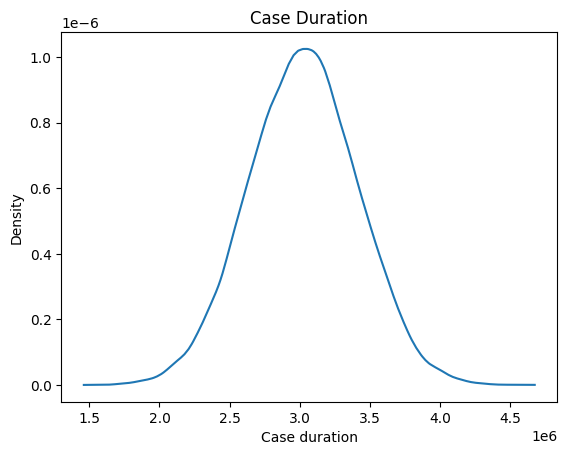

In [14]:
pm4py.view_case_duration_graph(log)

# Events per time

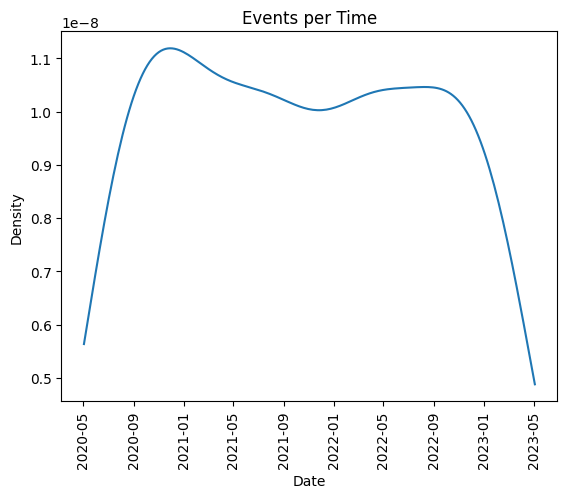

In [15]:
pm4py.view_events_per_time_graph(log)

In [16]:
log_dt = log.set_index('timestamp')

In [17]:
log_p = log_dt.set_index(log_dt.index.to_period('M') )
log_p

/tmp/ipykernel_3473/1301521526.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  log_p = log_dt.set_index(log_dt.index.to_period('M') )


,case_id,activity_name,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
timestamp,,,,,,,,,,,,,,,,,,
2022-04,000112d5-9d04-450f-820f-3edfc0626cf9,First Notification of Loss (FNOL),Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,000112d5-9d04-450f-820f-3edfc0626cf9,First Notification of Loss (FNOL),2022-04-19 01:47:54.857481+00:00,0,0
2022-05,000112d5-9d04-450f-820f-3edfc0626cf9,Assign Claim,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,000112d5-9d04-450f-820f-3edfc0626cf9,Assign Claim,2022-05-01 18:11:26.417687+00:00,1,0
2022-05,000112d5-9d04-450f-820f-3edfc0626cf9,Claim Decision,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,000112d5-9d04-450f-820f-3edfc0626cf9,Claim Decision,2022-05-03 07:01:46.479057+00:00,2,0
2022-05,000112d5-9d04-450f-820f-3edfc0626cf9,Set Reserve,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,000112d5-9d04-450f-820f-3edfc0626cf9,Set Reserve,2022-05-08 09:26:47.468433+00:00,3,0
2022-05,000112d5-9d04-450f-820f-3edfc0626cf9,Payment Sent,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,000112d5-9d04-450f-820f-3edfc0626cf9,Payment Sent,2022-05-15 16:12:46.119925+00:00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10,fffb4dea-5d95-4dcc-9a99-282595614167,Assign Claim,Sharon Sanchez,Christopher Nunez,Linda Oconnell,5143.61,24,Comprehensive,Nissan,Altima,2011,Side-impact,Human,fffb4dea-5d95-4dcc-9a99-282595614167,Assign Claim,2020-10-10 03:37:52.454864+00:00,179995,29999
2020-10,fffb4dea-5d95-4dcc-9a99-282595614167,Claim Decision,Sharon Sanchez,Christopher Nunez,Linda Oconnell,5143.61,24,Comprehensive,Nissan,Altima,2011,Side-impact,Human,fffb4dea-5d95-4dcc-9a99-282595614167,Claim Decision,2020-10-16 05:55:58.595998+00:00,179996,29999
2020-10,fffb4dea-5d95-4dcc-9a99-282595614167,Set Reserve,Sharon Sanchez,Christopher Nunez,Linda Oconnell,5143.61,24,Comprehensive,Nissan,Altima,2011,Side-impact,Human,fffb4dea-5d95-4dcc-9a99-282595614167,Set Reserve,2020-10-22 00:24:25.685952+00:00,179997,29999


In [18]:
# log_dt.resample('M', kind='period').agg({'activity_name': count, ''}).plot.bar()

# Arrival, Finish Rates

In [19]:
log = pm4py.analysis.insert_case_arrival_finish_rate(log)
sample_cases(log, 1)

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,...,car_year,type_of_accident,user_type,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,@@arrival_rate,@@finish_rate
35616,3250807e-d015-4689-80ac-5d3bec6a0bb7,First Notification of Loss (FNOL),2020-09-09 18:46:38.642880+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,First Notification of Loss (FNOL),2020-09-09 18:46:38.642880+00:00,35616,5936,1118.544497,6469.969524
35617,3250807e-d015-4689-80ac-5d3bec6a0bb7,Assign Claim,2020-09-21 00:11:15.929922+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,Assign Claim,2020-09-21 00:11:15.929922+00:00,35617,5936,1118.544497,6469.969524
35618,3250807e-d015-4689-80ac-5d3bec6a0bb7,Claim Decision,2020-09-25 18:10:55.776068+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,Claim Decision,2020-09-25 18:10:55.776068+00:00,35618,5936,1118.544497,6469.969524
35619,3250807e-d015-4689-80ac-5d3bec6a0bb7,Set Reserve,2020-09-29 08:44:37.512917+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,Set Reserve,2020-09-29 08:44:37.512917+00:00,35619,5936,1118.544497,6469.969524
35620,3250807e-d015-4689-80ac-5d3bec6a0bb7,Payment Sent,2020-10-08 08:45:25.312374+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,Payment Sent,2020-10-08 08:45:25.312374+00:00,35620,5936,1118.544497,6469.969524
35621,3250807e-d015-4689-80ac-5d3bec6a0bb7,Close Claim,2020-10-12 05:06:07.070469+00:00,Kimberly Davis MD,Thomas Miller,Jonathan Harvey,3362.58,51,Liability,Hyundai,...,2022,Rear-end,Human,3250807e-d015-4689-80ac-5d3bec6a0bb7,Close Claim,2020-10-12 05:06:07.070469+00:00,35621,5936,1118.544497,6469.969524


In [20]:
log = pm4py.analysis.insert_case_service_waiting_time(log)
# sample_cases(log, 2).iloc[:, [0,1,2,3,4,20,21,22,23,24,25]]

# Metrics

In [21]:
# Cycle time = Average time between completion of units.
cycle_time = pm4py.get_cycle_time(log)
cycle_time

0.0

In [22]:
stats.get_service_time(log)

{'Assign Claim': 0.0,
 'Claim Decision': 0.0,
 'Close Claim': 0.0,
 'First Notification of Loss (FNOL)': 0.0,
 'Payment Sent': 0.0,
 'Set Reserve': 0.0}

## Case duration metrics

### Helper functions to convert log timestamps to readable formats

In [23]:
def convert_seconds(seconds):
  delta = pd.Timedelta(seconds=seconds)
  weeks = delta.days // 7 
  days = delta.days % 7
  hours = delta.components.hours
  minutes = delta.components.minutes 
  return {
      "weeks": weeks,
      "days": days,
      "hours": hours,
      "minutes": minutes
  }

def format_time(time_components):

  parts = []
  if time_components['weeks'] > 0:
    parts.append(f"{time_components['weeks']} {'week' if time_components['weeks'] == 1 else 'weeks'}")
  if time_components['days'] > 0:
    parts.append(f"{time_components['days']} {'day' if time_components['days'] == 1 else 'days'}")
  if time_components['hours'] > 0:
    parts.append(f"{time_components['hours']} {'hour' if time_components['hours'] == 1 else 'hours'}")
  if time_components['minutes'] > 0:
    parts.append(f"{time_components['minutes']} {'minute' if time_components['minutes'] == 1 else 'minutes'}")
  if len(parts) == 0:
    parts.append("0 seconds")
  return ", ".join(parts)

def to_days(seconds):
  days = pd.Timedelta(seconds=seconds).days
  return days

def convert_and_format(seconds):
  converted_time = convert_seconds(seconds)
  return format_time(converted_time)
   

In [24]:
avg_sec =stats.get_case_arrival_average(log)

convert_and_format(avg_sec) 

'53 minutes'

In [25]:
import numpy as np

def calculate_duration(log, display=True):
    all_case_durations = stats.get_all_case_durations(log)
    mean = np.mean(all_case_durations)

    max = np.max(all_case_durations)
    mean = np.mean(all_case_durations)
    median = np.median(all_case_durations)
    min = np.min(all_case_durations)
    total = np.sum(all_case_durations)

    if display:
        print(f"Maximum case duration: {convert_and_format(max)} ({to_days(max)} days)")
        print(f"Average case duration: {convert_and_format(mean)} ({to_days(mean)} days)")
        print(f"Median case duration:  {convert_and_format(median)} ({to_days(median)} days)")
        print(f"Minimum case duration: {convert_and_format(min)} ({to_days(min)} days)")

    return max, mean, median, min, total

stats_tuple = calculate_duration(log)

Maximum case duration: 7 weeks, 5 days, 2 hours, 58 minutes (54 days)
Average case duration: 5 weeks, 22 minutes (35 days)
Median case duration:  5 weeks, 37 minutes (35 days)
Minimum case duration: 2 weeks, 2 days, 21 hours, 41 minutes (16 days)


In [96]:
# Extract the case start month

log['Case Start Month'] = log['timestamp'].dt.to_period('M').astype(str)

/tmp/ipykernel_3473/2762429364.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  log['Case Start Month'] = log['timestamp'].dt.to_period('M').astype(str)


## Performance DFG

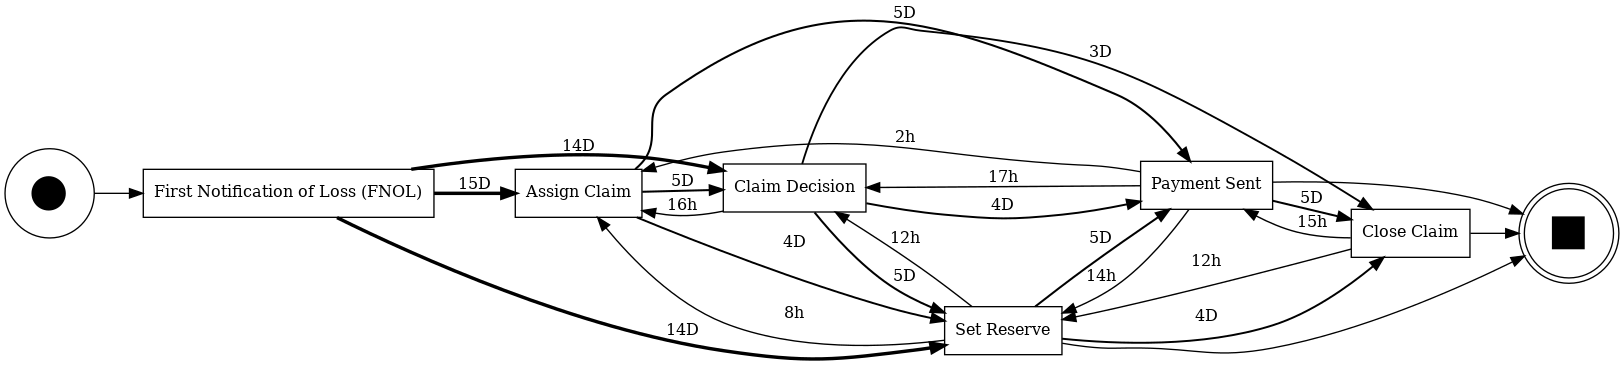

In [28]:
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(log)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)

# Discover process tree using Inductive Miner algorithm

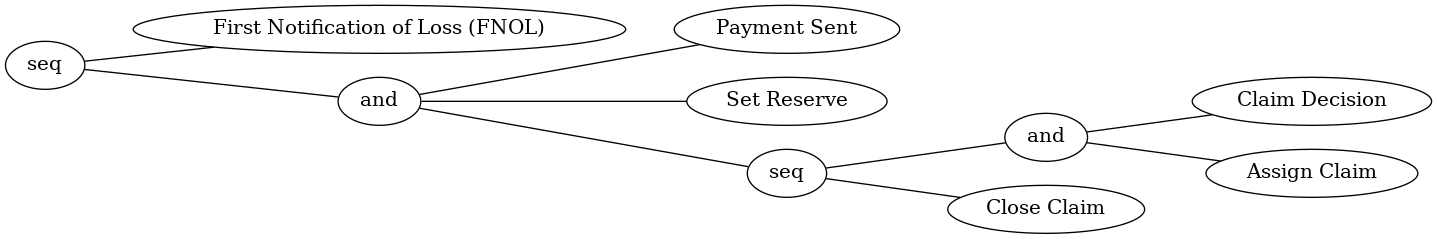

In [29]:
process_tree = pm4py.discover_process_tree_inductive(log)
pm4py.vis.view_process_tree(process_tree)

# Discover BPMN model


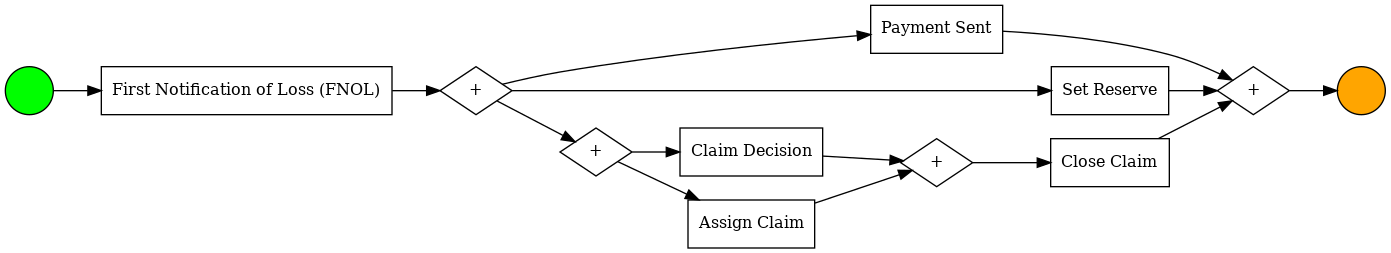

In [30]:
bpmn_model2 = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpmn_model2)

# Process discovery with Heuristics Miner

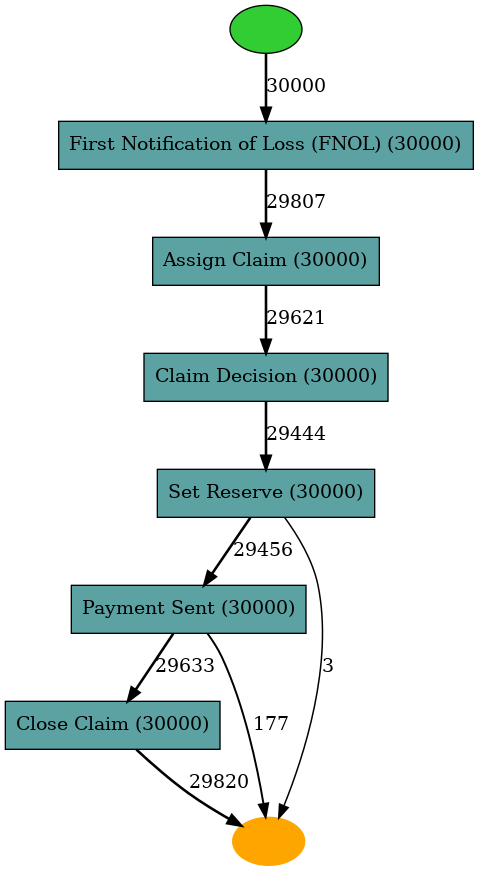

In [31]:
map = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(map)

# Directly Follows Graph

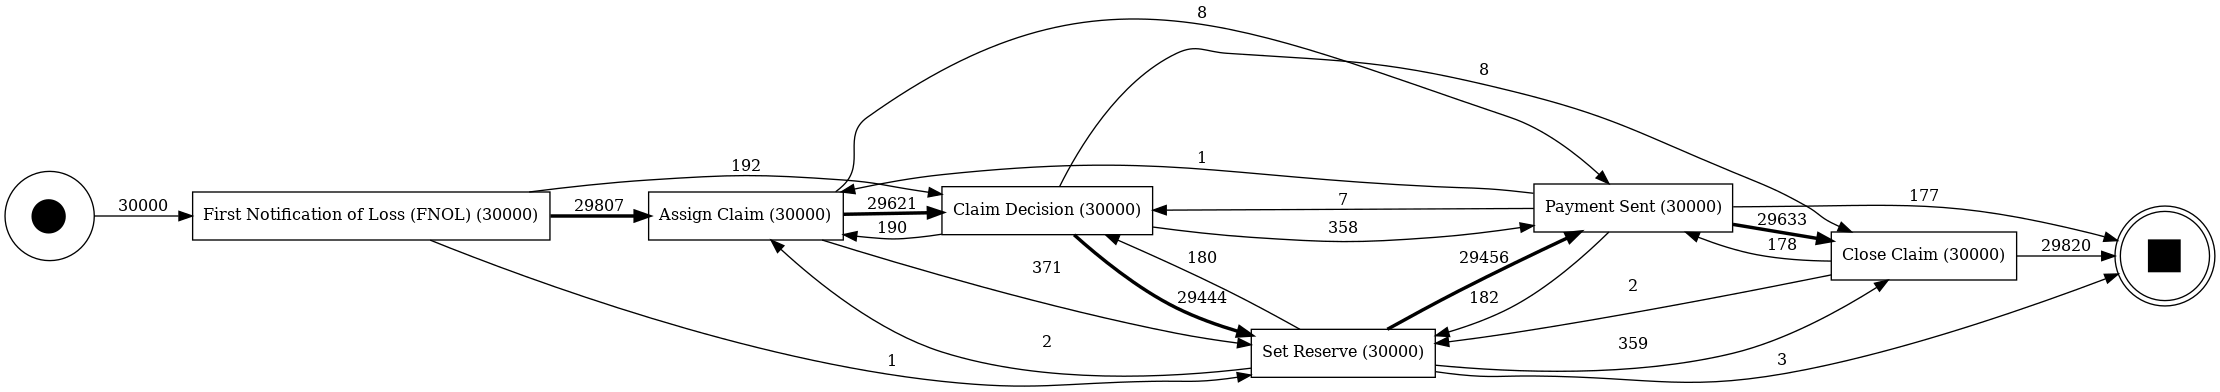

In [32]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Disscover Petri Net with Alpha Algorithm

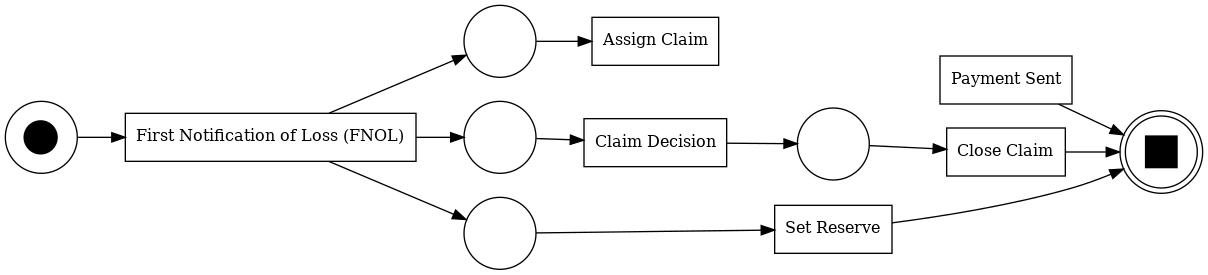

In [33]:
petri_net, initial_marking, final_marking = pm4py.discovery.discover_petri_net_alpha(log)
pm4py.view_petri_net(petri_net, initial_marking, final_marking)

# Conformance Checking

## Token-based Replay

In [34]:
tbr_diagnostics = conformance.conformance_diagnostics_token_based_replay(log, petri_net, initial_marking, final_marking)
tbr_diagnostics[0]

/home/mcarthuradal/Process Mining/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 15/15 [00:00<00:00, 33.71it/s]


{'trace_is_fit': False,
 'trace_fitness': 0.875,
 'activated_transitions': [(First Notification of Loss (FNOL), 'First Notification of Loss (FNOL)'),
  (Assign Claim, 'Assign Claim'),
  (Claim Decision, 'Claim Decision'),
  (Set Reserve, 'Set Reserve'),
  (Payment Sent, 'Payment Sent'),
  (Close Claim, 'Close Claim')],
 'reached_marking': ['end:3'],
 'enabled_transitions_in_marking': {(Payment Sent, 'Payment Sent')},
 'transitions_with_problems': [],
 'missing_tokens': 0,
 'consumed_tokens': 6,
 'remaining_tokens': 2,
 'produced_tokens': 8}

In [35]:
tbr_diagnostics_df = pd.DataFrame(tbr_diagnostics)
tbr_diagnostics_df

,trace_is_fit,trace_fitness,activated_transitions,reached_marking,enabled_transitions_in_marking,transitions_with_problems,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens
0,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
1,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
2,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
3,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
4,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
...,...,...,...,...,...,...,...,...,...,...
29995,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
29996,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
29997,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8
29998,False,0.875,"[(First Notification of Loss (FNOL), 'First No...",{end: 3},"{(Payment Sent, 'Payment Sent')}",[],0,6,2,8


In [36]:
tbr_diagnostics_df.describe()

,trace_fitness,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens
count,30000.000,30000.0,30000.0,30000.0,30000.0
mean,0.875,0.0,6.0,2.0,8.0
std,0.000,0.0,0.0,0.0,0.0
min,0.875,0.0,6.0,2.0,8.0
25%,0.875,0.0,6.0,2.0,8.0
50%,0.875,0.0,6.0,2.0,8.0
75%,0.875,0.0,6.0,2.0,8.0
max,0.875,0.0,6.0,2.0,8.0


# Alignment

In [37]:
alignment = conformance.fitness_token_based_replay(log, petri_net, initial_marking, final_marking)
alignment

replaying log with TBR, completed traces :: 100%|██████████| 15/15 [00:00<00:00, 27.99it/s]


{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.875,
 'log_fitness': 0.875,
 'percentage_of_fitting_traces': 0.0}

# Filtering the log

In [38]:
max_perf = pd.Timedelta(35, unit='days').total_seconds()
min_perf = pd.Timedelta(1, unit='days').total_seconds()
median_time_or_less = filtering.filter_case_performance(log, max_performance=max_perf, min_performance=min_perf)
hit_rate = median_time_or_less.case_id.nunique()/30000 * 100
print(f"{hit_rate} % of cases take 35 days or less.")

49.75 % of cases take 35 days or less.


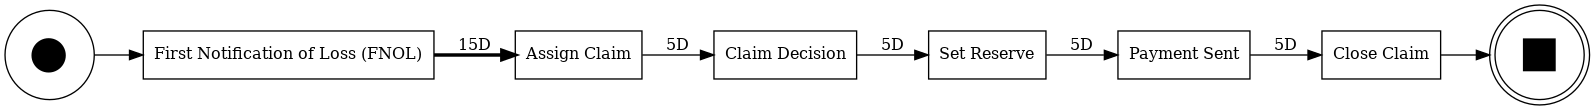

29265

In [101]:
best_variant = filtering.filter_variants_top_k(log, 1)
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(best_variant)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)
best_variant.case_id.nunique()

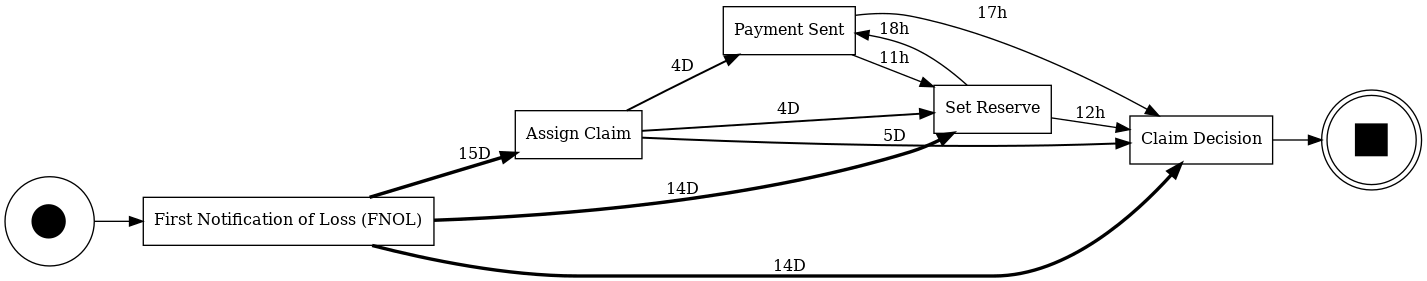

In [81]:
FNOL  = activities[0]
ASSIGN = activities[1]
CLAIM_DECISION = activities[2]
RESERVE = activities[3]
PAYMENT = activities[4]
CLOSE = activities[5]

fnol_close = filtering.filter_between(log, FNOL, CLAIM_DECISION)
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(fnol_close)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)

# Filter by event attribute: user_type

In [179]:
stats.get_event_attribute_values(log, 'user_type')

{'Human': 116400, 'RPA': 63600}

In [180]:
human = filtering.filter_event_attribute_values(log, attribute_key='user_type', values=['Human'], retain=True)
rpa = filtering.filter_event_attribute_values(log, attribute_key='user_type', values=['RPA'], retain=True)

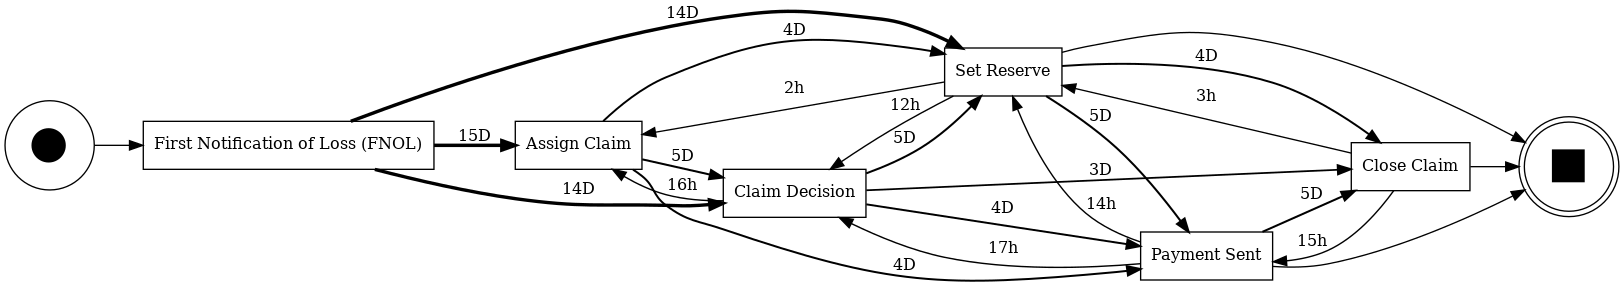

In [181]:
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(human)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)

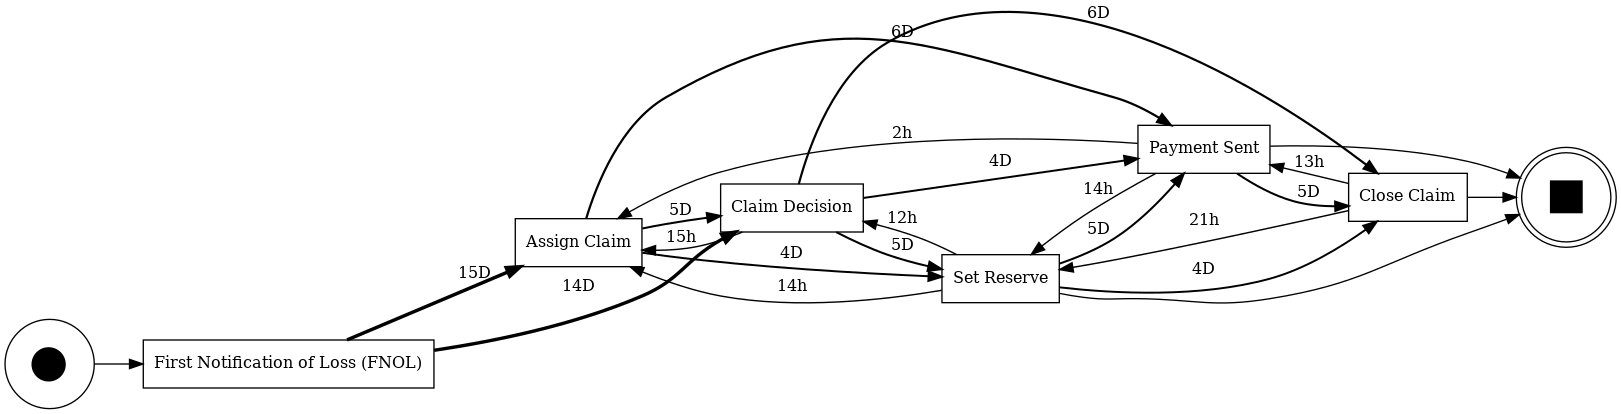

In [182]:
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(rpa)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)

In [183]:
human_perf = calculate_duration(human)


Maximum case duration: 7 weeks, 53 days, 40 minutes (53days)
Average case duration: 5 weeks, 35 days, 23 minutes (35 days)
Median case duration:  5 weeks, 35 days, 55 minutes (35 days)
Minimum case duration: 2 weeks, 16 days, 41 minutes (16 days)


In [184]:
rpa_perf = calculate_duration(rpa)

Maximum case duration: 7 weeks, 54 days, 58 minutes (54days)
Average case duration: 5 weeks, 35 days, 19 minutes (35 days)
Median case duration:  5 weeks, 35 days, 3 minutes (35 days)
Minimum case duration: 2 weeks, 17 days, 18 minutes (17 days)


## Variant Analysis

In [40]:
variants = stats.get_variants(log)
len(variants)

15

In [41]:
maxs = []
means = []
medians = []
mins = []
cases = []
variants = []
for _, variant in stats.split_by_process_variant(log):
    duration_stats = calculate_duration(variant, False)
    
    maxs.append(duration_stats[0])
    means.append(duration_stats[1])
    medians.append(duration_stats[2])
    mins.append(duration_stats[3])
    cases.append(variant.case_id.nunique()) 

    variants.append(variant)


In [42]:
variant_stats = pd.DataFrame({'maxs': maxs,
              'means': means,
              'medians': medians,
              'mins': mins,
              })

variant_stats = variant_stats.apply(lambda x: x.apply(to_days))
variant_stats['cases'] = cases
variant_stats.index.name = 'variant'
variant_stats

,maxs,means,medians,mins,cases
variant,,,,,
0,54,35,35,18,29265
1,40,29,29,21,175
2,38,29,29,19,180
3,42,30,30,19,173
4,40,29,29,20,188
5,31,25,25,18,4
6,29,25,23,23,3
7,27,23,21,21,3
8,29,28,28,27,2


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

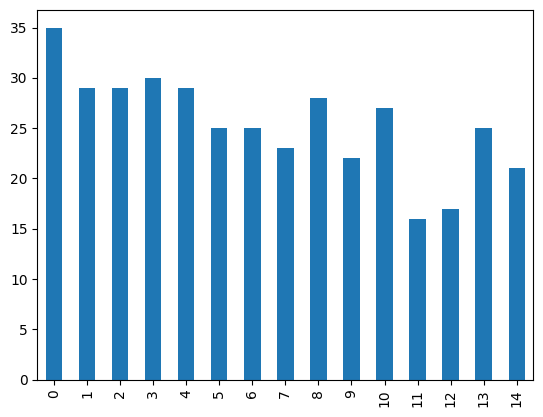

In [ ]:
variant_stats.means.plot.bar()
# plt.show()

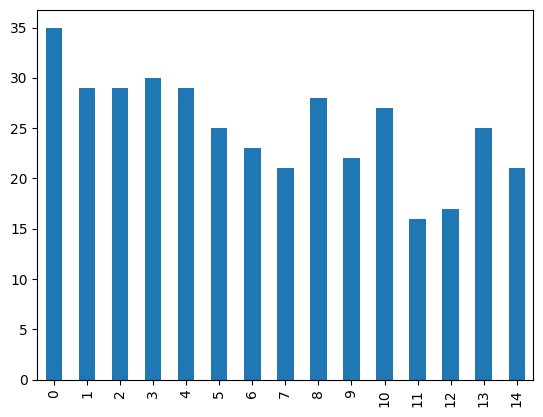

In [ ]:
variant_stats.medians.plot.bar()
# plt.show()

<Axes: >

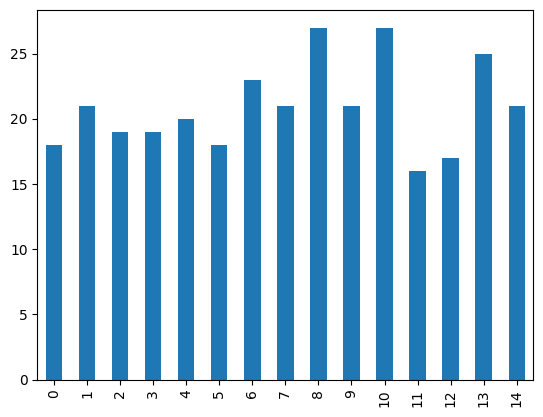

In [ ]:
variant_stats.mins.plot.bar()

## Best variant: 11

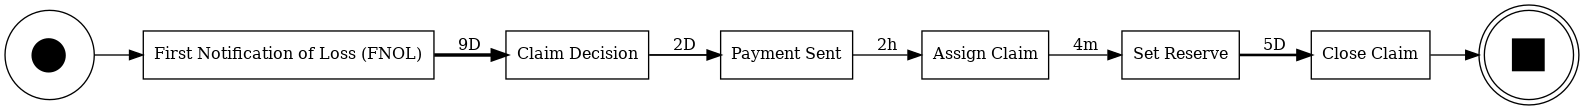

In [73]:
best_variant = variants[12]
perf_dfg, start_activity, end_activity = pm4py.discover_performance_dfg(best_variant)
pm4py.view_performance_dfg(perf_dfg, start_activity, end_activity)

In [47]:
num_events = len(best_variant)
num_cases = len(best_variant.case_id.unique())

print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 6
Number of cases: 1


In [48]:
best_variant.sort_values(by='timestamp', ascending=True).select_dtypes('object')

,case_id,activity_name,claimant_name,agent_name,adjuster_name,type_of_policy,car_make,car_model,type_of_accident,user_type,Case Start Month,@@variant_column
67938,601ac0d2-b15d-4a95-9320-3044bfc068ad,First Notification of Loss (FNOL),Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."
67939,601ac0d2-b15d-4a95-9320-3044bfc068ad,Assign Claim,Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."
67940,601ac0d2-b15d-4a95-9320-3044bfc068ad,Claim Decision,Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."
67941,601ac0d2-b15d-4a95-9320-3044bfc068ad,Close Claim,Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."
67942,601ac0d2-b15d-4a95-9320-3044bfc068ad,Payment Sent,Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."
67943,601ac0d2-b15d-4a95-9320-3044bfc068ad,Set Reserve,Kimberly Anderson,Sean Weaver,Seth Trevino,Collision,Ford,F-150,Side-impact,Human,2021-12,"(First Notification of Loss (FNOL), Assign Cla..."


In [49]:
best_case=best_variant.case_id.unique().item()
tt = stats.get_case_duration(log, best_case)
to_days(tt)

16

# Variant paths

## Median time between activities

In [44]:
var_paths_duration = stats.get_variants_paths_duration(log, times_agg='median')
tput = var_paths_duration['@@flow_time'].apply(convert_and_format)
var_paths_duration['@@flow_time'] = var_paths_duration['@@flow_time'].apply(to_days)
var_paths_duration.insert(2, 'throughput', tput)
var_paths_duration.sort_values(by='@@flow_time', ascending=False)

,@@index_in_trace,@@flow_time,throughput,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,15,"2 weeks, 1 day, 28 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",29265
0,0,15,"2 weeks, 1 day, 15 hours, 29 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",2
0,0,14,"2 weeks, 16 hours, 14 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",180
0,0,14,"2 weeks, 22 hours, 43 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",173
0,0,14,"2 weeks, 18 hours, 47 minutes",0,First Notification of Loss (FNOL),Set Reserve,"(First Notification of Loss (FNOL), Set Reserv...",1
...,...,...,...,...,...,...,...,...
1,1,0,"10 hours, 15 minutes",0,Set Reserve,Claim Decision,"(First Notification of Loss (FNOL), Set Reserv...",1
4,4,0,"8 hours, 9 minutes",0,Close Claim,Payment Sent,"(First Notification of Loss (FNOL), Claim Deci...",1
3,3,0,"6 hours, 21 minutes",0,Set Reserve,Claim Decision,"(First Notification of Loss (FNOL), Assign Cla...",1
2,2,0,"11 hours, 42 minutes",0,Payment Sent,Set Reserve,"(First Notification of Loss (FNOL), Assign Cla...",1


In [52]:
var_paths_duration['@@variant_column'].value_counts()

@@variant_column
(First Notification of Loss (FNOL), Assign Claim, Claim Decision, Set Reserve, Payment Sent, Close Claim)    5
(First Notification of Loss (FNOL), Claim Decision, Assign Claim, Set Reserve, Payment Sent, Close Claim)    5
(First Notification of Loss (FNOL), Assign Claim, Claim Decision, Payment Sent, Set Reserve, Close Claim)    5
(First Notification of Loss (FNOL), Assign Claim, Set Reserve, Claim Decision, Payment Sent, Close Claim)    5
(First Notification of Loss (FNOL), Assign Claim, Claim Decision, Set Reserve, Close Claim, Payment Sent)    5
(First Notification of Loss (FNOL), Assign Claim, Payment Sent, Claim Decision, Set Reserve, Close Claim)    5
(First Notification of Loss (FNOL), Assign Claim, Set Reserve, Payment Sent, Claim Decision, Close Claim)    5
(First Notification of Loss (FNOL), Assign Claim, Set Reserve, Claim Decision, Close Claim, Payment Sent)    5
(First Notification of Loss (FNOL), Claim Decision, Set Reserve, Assign Claim, Payment Sent, Cl

In [78]:
var_paths_duration[(var_paths_duration["concept:name"] == "First Notification of Loss (FNOL)") ]

,@@index_in_trace,@@flow_time,throughput,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,15,"2 weeks, 1 day, 28 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",29265
0,0,14,"2 weeks, 15 hours, 38 minutes",0,First Notification of Loss (FNOL),Claim Decision,"(First Notification of Loss (FNOL), Claim Deci...",188
0,0,14,"2 weeks, 16 hours, 14 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",180
0,0,14,"2 weeks, 22 hours, 46 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",175
0,0,14,"2 weeks, 22 hours, 43 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",173
0,0,14,"2 weeks, 20 hours, 33 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",4
0,0,14,"2 weeks, 23 hours, 47 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",3
0,0,14,"2 weeks, 23 hours, 40 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",3
0,0,12,"1 week, 5 days, 6 hours, 44 minutes",0,First Notification of Loss (FNOL),Claim Decision,"(First Notification of Loss (FNOL), Claim Deci...",2
0,0,15,"2 weeks, 1 day, 15 hours, 29 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",2


In [82]:
var_paths_duration[(var_paths_duration["concept:name"] == FNOL) & 
                    (var_paths_duration['concept:name_2'] == ASSIGN)] \
                    .sort_values(by='@@flow_time')

,@@index_in_trace,@@flow_time,throughput,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,11,"1 week, 4 days, 23 hours, 5 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",1
0,0,11,"1 week, 4 days, 14 hours, 13 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",1
0,0,14,"2 weeks, 16 hours, 14 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",180
0,0,14,"2 weeks, 22 hours, 46 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",175
0,0,14,"2 weeks, 23 hours, 40 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",3
0,0,14,"2 weeks, 23 hours, 47 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",3
0,0,14,"2 weeks, 22 hours, 43 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",173
0,0,14,"2 weeks, 20 hours, 33 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",4
0,0,15,"2 weeks, 1 day, 15 hours, 29 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",2
0,0,15,"2 weeks, 1 day, 28 minutes",0,First Notification of Loss (FNOL),Assign Claim,"(First Notification of Loss (FNOL), Assign Cla...",29265


In [105]:
max_perf = pd.Timedelta(11, unit='days').total_seconds()
min_perf = pd.Timedelta(1, unit='days').total_seconds()
fnol_assign_perf = filtering.filter_paths_performance(log, path=(FNOL, ASSIGN), min_performance=min_perf, max_performance=max_perf)
fnol_assign_perf.describe(include='object')

,case_id,activity_name,claimant_name,agent_name,adjuster_name,type_of_policy,car_make,car_model,type_of_accident,user_type,Case Start Month
count,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942
unique,657,6,654,652,651,3,7,7,4,2,38
top,ff0d8901-05fa-4b27-85e5-2298b6806f93,First Notification of Loss (FNOL),Christopher Romero,Michael Anderson,Michael Simpson,Comprehensive,Ford,F-150,Rear-end,Human,2021-06
freq,6,657,12,12,12,1386,606,606,1104,2592,154


In [106]:
max_perf = pd.Timedelta(15, unit='days').total_seconds()
min_perf = pd.Timedelta(14, unit='days').total_seconds()
fnol_assign_perf = filtering.filter_paths_performance(log, path=(FNOL, ASSIGN), min_performance=min_perf, max_performance=max_perf)
fnol_assign_perf.describe(include='object')

,case_id,activity_name,claimant_name,agent_name,adjuster_name,type_of_policy,car_make,car_model,type_of_accident,user_type,Case Start Month
count,34020,34020,34020,34020,34020,34020,34020,34020,34020,34020,34020
unique,5670,6,5461,5468,5466,3,7,7,4,2,38
top,ffdf3db2-8a58-488e-8b94-59128310fa82,First Notification of Loss (FNOL),John Gonzalez,Michael Davis,Michael Smith,Liability,Honda,Civic,Rear-end,Human,2021-12
freq,6,5670,24,36,36,11622,4968,4968,8580,21660,1106


In [107]:
max_perf = pd.Timedelta(35, unit='days').total_seconds()
min_perf = pd.Timedelta(1, unit='days').total_seconds()
fnol_assign_perf = filtering.filter_case_performance(log, min_performance=min_perf, max_performance=max_perf)
fnol_assign_perf.describe(include='object')

,case_id,activity_name,claimant_name,agent_name,adjuster_name,type_of_policy,car_make,car_model,type_of_accident,user_type,Case Start Month
count,89550,89550,89550,89550,89550,89550,89550,89550,89550,89550,89550
unique,14925,6,13702,13714,13694,3,7,7,4,2,38
top,fff8ae66-b0e6-4db0-80fe-8788626cee99,First Notification of Loss (FNOL),Michael Smith,Michael Williams,Joseph Miller,Comprehensive,Ford,F-150,Head-on,Human,2020-12
freq,6,14925,54,42,42,29970,13296,13296,22770,57768,2750


In [108]:
max_perf = pd.Timedelta(55, unit='days').total_seconds()
min_perf = pd.Timedelta(35, unit='days').total_seconds()
fnol_assign_perf = filtering.filter_case_performance(log, min_performance=min_perf, max_performance=max_perf)
fnol_assign_perf.describe(include='object')

,case_id,activity_name,claimant_name,agent_name,adjuster_name,type_of_policy,car_make,car_model,type_of_accident,user_type,Case Start Month
count,90450,90450,90450,90450,90450,90450,90450,90450,90450,90450,90450
unique,15075,6,13761,13800,13783,3,7,7,4,2,38
top,fffb4dea-5d95-4dcc-9a99-282595614167,First Notification of Loss (FNOL),Michael Williams,Michael Smith,James Smith,Collision,Ford,F-150,Side-impact,Human,2021-12
freq,6,15075,48,60,48,30462,13344,13344,23178,58632,2664


In [94]:
for activity in activities:
    for resource in ['agent_name', 'adjuster_name']:
        s = filtering.filter_activity_done_different_resources(log, activity, resource_key=resource).shape
        print(s)

(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
